In [6]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [7]:
import pandas as pd
import os, shutil

In [8]:
filenames = os.listdir("/content/gdrive/My Drive/cap/warm_cool/")
categories = []
for filename in filenames:
  if filename[:3] == '웜':
      categories.append(1)
  else:
      categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [9]:
df

,filename,category
0,train,0
1,val,0
2,test,0


In [ ]:
base_dir = '/content/gdrive/My Drive/cap/wc2'
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [ ]:
val_dir = os.path.join(base_dir, 'val')
os.mkdir(val_dir)

In [ ]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
train_cool_dir = os.path.join(train_dir, 'cool')
os.mkdir(train_cool_dir)

In [ ]:
train_warm_dir = os.path.join(train_dir, 'warm')
os.mkdir(train_warm_dir)

In [ ]:
val_cool_dir = os.path.join(val_dir, 'cool')
os.mkdir(val_cool_dir)

In [ ]:
val_warm_dir = os.path.join(val_dir, 'warm')
os.mkdir(val_warm_dir)

In [ ]:
test_cool_dir = os.path.join(test_dir, 'cool')
os.mkdir(test_cool_dir)

In [ ]:
test_warm_dir = os.path.join(test_dir, 'warm')
os.mkdir(test_warm_dir)

In [ ]:
for fname in sorted(filenames)[:750] :
  src = os.path.join('/content/gdrive/My Drive/cap/warm_cool', fname)
  dst = os.path.join(train_warm_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
for fname in sorted(filenames)[750:900] :
  src = os.path.join('/content/gdrive/My Drive/cap/warm_cool', fname)
  dst = os.path.join(val_warm_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
for fname in sorted(filenames)[900:996] :
  src = os.path.join('/content/gdrive/My Drive/cap/warm_cool', fname)
  dst = os.path.join(test_warm_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
for fname in sorted(filenames)[996:1746] :
  src = os.path.join('/content/gdrive/My Drive/cap/warm_cool', fname)
  dst = os.path.join(train_cool_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
for fname in sorted(filenames)[1746:1896] :
  src = os.path.join('/content/gdrive/My Drive/cap/warm_cool', fname)
  dst = os.path.join(val_cool_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
for fname in sorted(filenames)[1896:] :
  src = os.path.join('/content/gdrive/My Drive/cap/warm_cool', fname)
  dst = os.path.join(test_cool_dir, fname)
  shutil.copyfile(src, dst)

In [11]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import *
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range = 35,
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.4,
    horizontal_flip = True,
    width_shift_range = 0.15,
    height_shift_range = 0.15
)

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/cap/warm_cool/train/', 
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 16
)

Found 1413 images belonging to 2 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale = 1 / 255)

validation_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/cap/warm_cool/val/',
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary'
)

Found 291 images belonging to 2 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/cap/warm_cool/test/',
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary'
)

Found 174 images belonging to 2 classes.


In [16]:
 model = Sequential([
  Conv2D(64, 3, padding='same', activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(),
  Dropout(.2), # 과적합 방지
  Conv2D(64, 3, padding='same', activation='relu'),
  BatchNormalization(), # 과적합 방지
  MaxPooling2D(),
  Flatten(), 
  Dense(32, activation='relu'), 
  Dense(1, activation='sigmoid') 
])

model.compile(loss = "binary_crossentropy", 
              optimizer = Adam(lr = .0002),
              metrics = ['acc']) 
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [17]:
%cd /content/gdrive/My Drive/cap

/content/gdrive/My Drive/cap


In [18]:
mc = ModelCheckpoint('optimum_warm_cool_model.h5', save_best_only=True, verbose=1, monitor = 'val_acc', mode = 'max')

In [35]:
history = model.fit_generator(train_generator, epochs = 15, validation_data = validation_generator, validation_steps = 19, callbacks = [mc, EarlyStopping(monitor='val_acc', patience = 3)])

Epoch 1/15
89/89 [==============================] - 11s 129ms/step - loss: 0.5844 - acc: 0.6971 - val_loss: 0.8588 - val_acc: 0.5670

Epoch 00001: val_acc did not improve from 0.57388
Epoch 2/15
89/89 [==============================] - 11s 128ms/step - loss: 0.5827 - acc: 0.6914 - val_loss: 1.2496 - val_acc: 0.5292

Epoch 00002: val_acc did not improve from 0.57388
Epoch 3/15
89/89 [==============================] - 11s 129ms/step - loss: 0.5819 - acc: 0.6943 - val_loss: 1.0901 - val_acc: 0.5361

Epoch 00003: val_acc did not improve from 0.57388
Epoch 4/15
89/89 [==============================] - 11s 128ms/step - loss: 0.5727 - acc: 0.7021 - val_loss: 0.8737 - val_acc: 0.5430

Epoch 00004: val_acc did not improve from 0.57388


In [36]:
final_model = load_model('optimum_warm_cool_model.h5')

In [37]:
pred = final_model.predict_generator(test_generator)

In [38]:
actual = [1 if 'warm' in x  else 0 for x in list(test_generator.filenames)]

In [39]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(actual, (pred > .5).astype(int))

print(f'딥러닝 모델의 정확도는 {round(acc * 100, 3)}%')

딥러닝 모델의 정확도는 54.598%


In [40]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def get_image_description() :
  print(f'사진 개수는 총 {len(test_generator.filenames)}개로 0과 173 사이의 숫자를 입력해주세요.')
  num = input('숫자를 입력하세요 : ')
  num = int(num)
  img = '/content/gdrive/My Drive/cap/warm_cool/test/' + test_generator.filenames[num]
  print(f"\n사진명 : {img.split('/')[-1]}")
  sample_label = '웜톤' if int(pred[num] > .5) == 1 else "쿨톤"
  sample_actual = '웜톤' if actual[num] == 1 else "쿨톤"
  print(f'모델링 결과 이 사진은 {sample_label}입니다.')
  print(f'실제 결과 이 사진은 {sample_actual}입니다.')
  display(Image(img))

사진 개수는 총 174개로 0과 173 사이의 숫자를 입력해주세요.
숫자를 입력하세요 : 92

사진명 : 웜톤910.jpg
모델링 결과 이 사진은 웜톤입니다.
실제 결과 이 사진은 웜톤입니다.


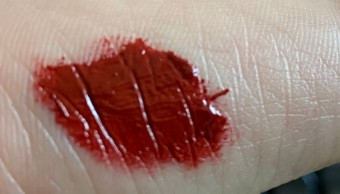

In [87]:
get_image_description()